In [88]:
%cd /home/epicpants/workspace/personal/yolo

/home/epicpants/workspace/personal/yolo


In [89]:
from torchvision.datasets import VOCDetection
from torchvision.transforms import transforms
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import matplotlib
import numpy as np
import random
import cv2

In [90]:
def color_list():
    # Return first 10 plt colors as (r,g,b) https://stackoverflow.com/questions/51350872/python-from-color-name-to-rgb
    def hex2rgb(h):
        return tuple(int(h[1 + i:1 + i + 2], 16) for i in (0, 2, 4))

    return [hex2rgb(h) for h in matplotlib.colors.TABLEAU_COLORS.values()]  # or BASE_ (8), CSS4_ (148), XKCD_ (949)

def plot_one_box(x, img, color=None, label=None, line_thickness=3):
    img = np.array(img)
    # Plots one bounding box on image img
    tl = line_thickness or round(0.002 * (img.shape[0] + img.shape[1]) / 2) + 1  # line/font thickness
    color = color or [random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    cv2.rectangle(img, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    if label:
        tf = max(tl - 1, 1)  # font thickness
        t_size = cv2.getTextSize(label, 0, fontScale=tl / 3, thickness=tf)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(img, c1, c2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(img, label, (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)
    return img

colors = color_list()

In [91]:
CLASSES = (
    "aeroplane",
    "bicycle",
    "bird",
    "boat",
    "bottle",
    "bus",
    "car",
    "cat",
    "chair",
    "cow",
    "diningtable",
    "dog",
    "horse",
    "motorbike",
    "person",
    "pottedplant",
    "sheep",
    "sofa",
    "train",
    "tvmonitor",
)

In [92]:
dataset = VOCDetection(root="./data/", image_set="trainval")

{'annotation': {'folder': 'VOC2012', 'filename': '2008_000054.jpg', 'source': {'database': 'The VOC2008 Database', 'annotation': 'PASCAL VOC2008', 'image': 'flickr'}, 'size': {'width': '500', 'height': '333', 'depth': '3'}, 'segmented': '0', 'object': [{'name': 'bird', 'pose': 'Unspecified', 'truncated': '0', 'occluded': '0', 'bndbox': {'xmin': '284', 'ymin': '100', 'xmax': '318', 'ymax': '184'}, 'difficult': '0'}, {'name': 'bird', 'pose': 'Right', 'truncated': '0', 'occluded': '0', 'bndbox': {'xmin': '112', 'ymin': '146', 'xmax': '198', 'ymax': '209'}, 'difficult': '0'}]}}
{'width': '500', 'height': '333', 'depth': '3'}


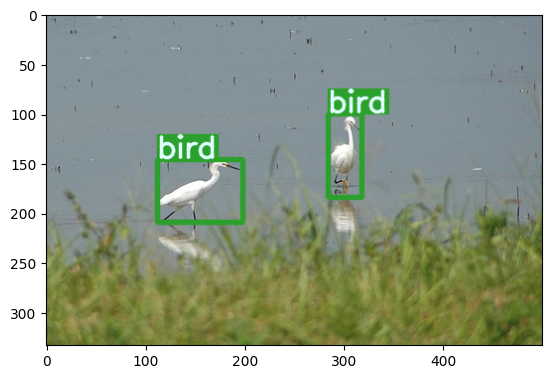

In [95]:
image, label = dataset[26]
# visualize the image and the bounding boxes
print(label)
size = label['annotation']['size']
width = size['width']
height = size['height']
print(size)
img = image
for o in label['annotation']['object']:
    label = o['name']
    xmin, ymin, xmax, ymax = int(o['bndbox']['xmin']), int(o['bndbox']['ymin']), int(o['bndbox']['xmax']), int(o['bndbox']['ymax'])
    # rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, facecolor='none', edgecolor=color, linewidth=3)
    # plot_one_box([100, 100, 200, 200], image, color=(255, 0, 0), label=label, line_thickness=3)
    img = plot_one_box([xmin, ymin, xmax, ymax], img, color=colors[int(CLASSES.index(label)) % 10], label=label, line_thickness=3)
plt.imshow(img)
plt.show()